**Problem statement**
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/train.csv')
test = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/test.csv')
tags = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/tags.csv')
movies = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/movies.csv')
links = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/links.csv')
imdb_data = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/imdb_data.csv')
genome_scores = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/genome_scores.csv')
genome_tags = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/genome_tags.csv')

In [3]:
pd.set_option("display.max_colwidth", -1)#this display the full width of the columns

<ipython-input-3-08886b5f5d00>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)#this display the full width of the columns


In [4]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
train.shape

(10000038, 4)

In [6]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [7]:
test.shape

(5000019, 2)

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

In [23]:
movie_desc = train.merge(movies, on = 'movieId', how = 'left' )
movie_desc.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller


In [24]:
movie_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 534.1+ MB


In [10]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [11]:
tags.shape

(1093360, 4)

In [12]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [13]:
genome_scores.shape

(15584448, 3)

In [14]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [15]:
genome_tags.shape

(1128, 2)

In [16]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [17]:
imdb_data.shape

(27278, 6)

In [18]:
#first for the train dataset...
print(train.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [19]:
#first for the train dataset...
print(test.isnull().sum())

userId     0
movieId    0
dtype: int64


In [20]:
#first train...
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
Average_ratings = pd.DataFrame(movie_desc.groupby('title')['rating'].mean().sort_values(ascending=False))
Average_ratings.head(10)

In [ ]:
Average_ratings['Total_Ratings'] = pd.DataFrame(movie_desc.groupby('title')['rating'].count())
Average_ratings.head(10)

In [21]:
train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5    880516 
2.0    656821 
2.5    505578 
1.0    311213 
1.5    159731 
0.5    157571 
Name: rating, dtype: int64

**DATA VISUALIZATIONS**

**Bar graphs**

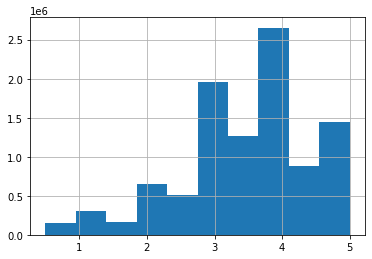

In [22]:
train['rating'].hist(bins = 10)

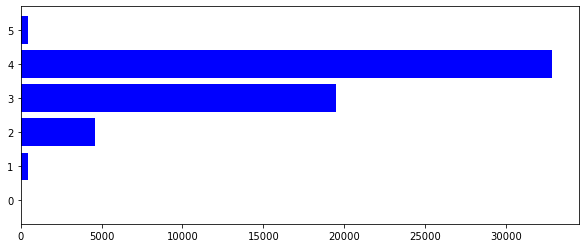

In [45]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(Average_ratings['rating'].round(),Average_ratings['Total_Ratings'],color='b')
plt.show()

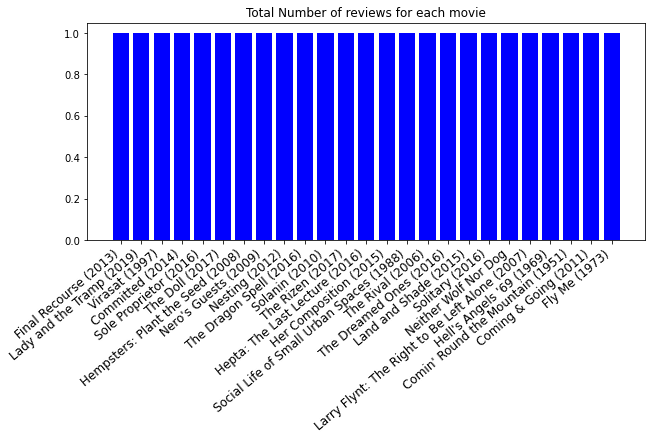

In [46]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(Average_ratings.head(25).index,Average_ratings['Total_Ratings'].head(25),color='b')
ax.set_xticklabels(Average_ratings.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

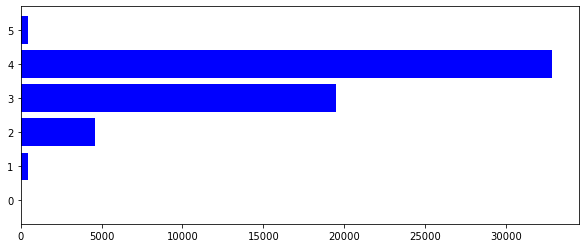

In [47]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(Average_ratings['rating'].round(),Average_ratings['Total_Ratings'],color='b')
plt.show()

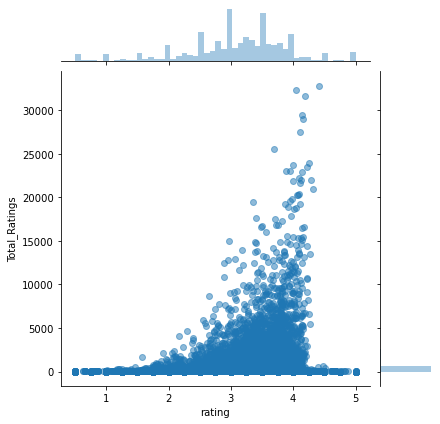

In [49]:
sns.jointplot(x='rating',y='Total_Ratings',data=Average_ratings,alpha=0.5)

**Grouping the numerical columns**
- This will help filtering the numerical column and reduce the volume of the dataset

In [ ]:
train_df= train.drop(['userId','timestamp'], axis=1)

In [ ]:
train_df.head()

In [ ]:
genome_scores_df = genome_scores.drop('tagId', axis = 1)

In [ ]:
genome_scores_df

In [ ]:
imdb_data_df = imdb_data.drop(['title_cast','director','plot_keywords'],axis=1)

In [ ]:
imdb_data_df.head()

In [ ]:
train_genome = train_df.merge(genome_scores_df, on = 'movieId',how ='right')

In [ ]:
numeric_col = train_genome.merge(imdb_data_df, on = 'movieId', how = 'left')

**Correlation Heatmap**

In [ ]:
#creating a correlation heat map
corr = numeric_col.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr)

**Scatter Plots**